# HW1: getting familiar with plotting in Python.  
## Overview:
* [Problem 1] Getting familiar with matplotlib
    * basic line plots from synthetic data
    * labeling your axes
* [Problem 2] Exponential processes and log-scales.
    * Exponentials vs. power laws. What the log-scale gets us.
* [Problem 3] Visualizing probability distributions
    * histograms and the problem of binning
    * empirical cumulative distribution functions
    * Box and whisker or violin plots for many variables
* [Problem 4] Correlations between many variables
    * Plotting matrices
    * Heatmaps for finding patterns data

## [Problem 1] Getting familiar with matplotlib

This first exercise is simply to start getting familiar with Matplotlib, the main plotting library used in Python.  The goal here will simply be to plot some data, manipulate the axes, create some subplots.  If you are not familiar with Pythong please take the time to go through the tutorials provided on the course website. First step is import the necessary packages.

**Question 1.1** (2pts) Create a figure which plots and y against x (y on the vertical axis, x on the horizontal axis). Include a title and label the axes.

Text(0, 0.5, 'y')

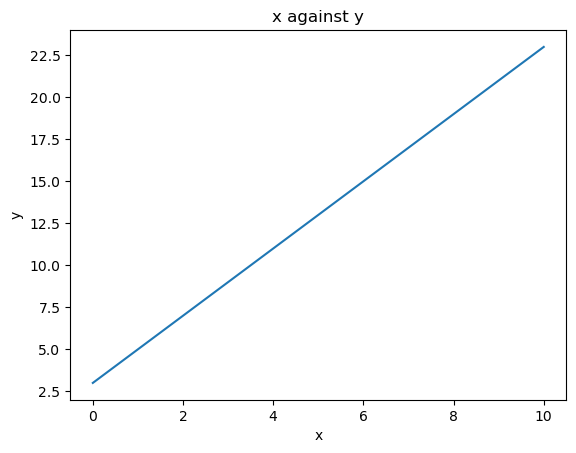

In [3]:
import matplotlib.pyplot as plt # this is standard practice since one calls the pyplot library regularly.  using "plt" keeps function calls short.
import numpy as np # similarly, using "np" means we don't have to write out "numpy" for each function call within the library.
# first we'll create some synthetic data

# Define the range for the variable x
x = np.linspace(0, 10, 200)
b = 2
c = 3
# Calculate y
y = b * x + c

plt.plot(x,y)
plt.title("x against y")
plt.xlabel("x")
plt.ylabel("y")

**Question 1.2** (2pts) Most data comes with some variation or noise. Our synthetic data so far is a perfect line reflecting a simple linear relationship between the variables x and y.  Create a new version of the variable y (with the same values of b and c defined above) with added noise. So, what we want to plot is the equation $$y = bx +c +\eta$$ where $\eta$ is a random number drawn from a Gaussian (or Normal) distribution with variance equal to 1.  Create this new version of the variable y (be sure to give it a new name).  Then use the "subplot" command from the matplotlib.pyplot library to create two panels -- the one on the left should reproduce the plot above for y with out noise.  The one on the right should include the unit variance noise.  Again, include titles and x and y labels on your plots.

Text(0, 0.5, 'y')

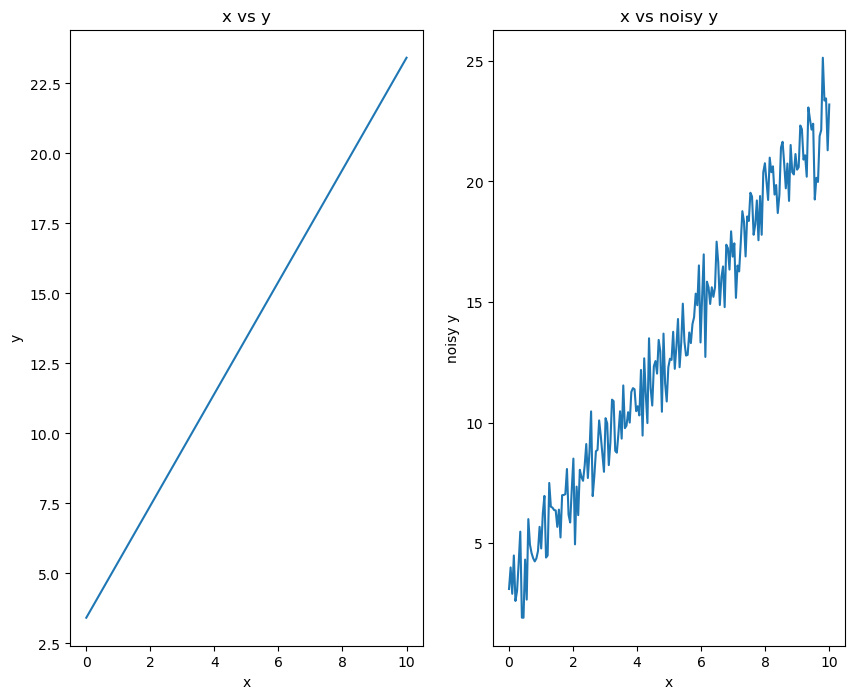

In [18]:
y_var = []

p, axes = plt.subplots(1,2, figsize=(10,8))

for x0 in x:
    eta = np.random.normal(0,1)
    y_var.append(b * x0 + c + eta)
    
axes[1].plot(x,y_var)
axes[1].set_title("x vs noisy y")
axes[1].set_xlabel("x")
axes[1].set_ylabel("noisy y")

axes[0].plot(x,y)
axes[0].set_title("x vs y")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")


## [Problem 2] Exponential processes and log-scales.

In biological processes, and particularly in microbial communities, we often encounter processes that are exponential in time. Any autocatalytic process such as growth will often have exponential dynamics and we will encounter these repeatedly in the third module of this course.  For example, when a population of bacteria is growing exponentially, the number of cells as a function of time is described by $$ N(t) = N(0) e^{\mu t} $$ where $\mu$ is the growth rate and $N(0)$ is the number of cells at time zero.  The way plot these types of data is very important for their interpretation.

**Question 2.1** (2pts) Consider a bacterial population that starts with one hundred cells ($N(0) = 100$) and growth with a growth rate of $\mu = 1$ 1/h.  Assuming exponential growth create a time series of $N(t)$ for 12 hours. First make a plot of $N(t)$ as a function of time.  

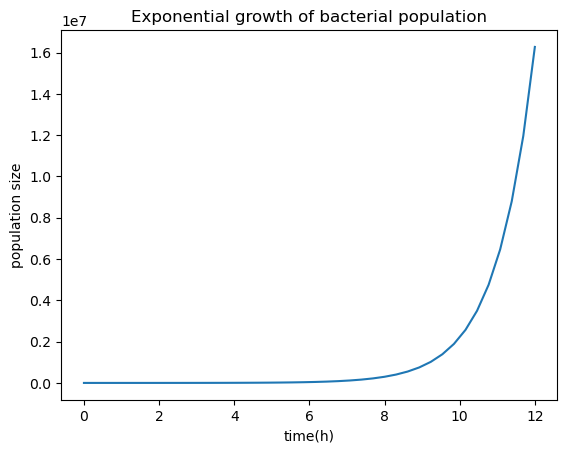

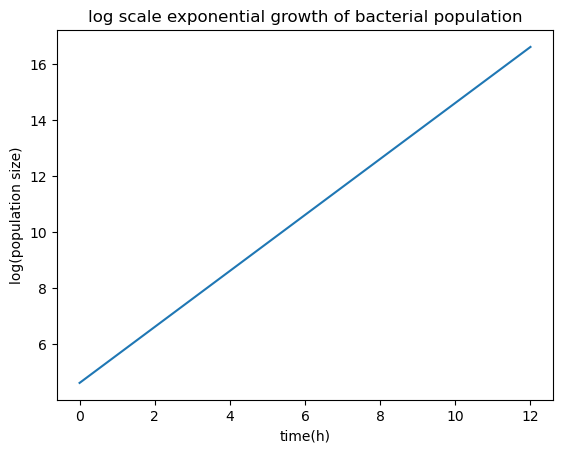

In [29]:
mu = 1
N0 = 100
times = np.linspace(0,12,40)

def Fn(N0, mu, t):
    return (N0 * np.exp(mu*t))

plt.figure()
plt.plot(times, Fn(N0, 1, times))
plt.title("Exponential growth of bacterial population")
plt.xlabel("time(h)")
plt.ylabel("population size")
plt.show()

plt.plot(times, np.log(Fn(N0,1,times)))
plt.title("log scale exponential growth of bacterial population")
plt.xlabel("time(h)")
plt.ylabel("log(population size)")
plt.show()

**Question 2.2** (4pts, 2pts for plot, 2pts for answer) Now take the same data and plot it log-scale on the vertical (y-axis).  In this representation the data no longer is a curve but is instead a line.  **What parameter in the equation above controls the slope of the line?  Mathematically, why is this the case?**

In [ ]:
mu controls the slope of the line, since once you take the log, mu becomes the coefficient of t.

## [Problem 3] Visualizing probability distributions

Consider the data in the provided "SyntheticDataDistribution.xlsx" file.  These data are 1000 samples from a pre-defined probability distribution. The question we would like to interrogate is whether or not the data is drawn from a Gaussian distribution with a single mode or not.  There are sophisticated statsitical methods for interrogating this problem, but rather than take this route we will plot the data and ask whether it is reasonable to assume that this was generated from a Gaussian distribution or not.  We're not so much interested in the right answer as we are the process of interrogating the data visually.

Recall that a Gaussian distribution has two parameters -- the mean $\mu$ and the variance $\sigma^2$ and the probability distribution function of the Gaussian is
$$ f(x | \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$
where $x$ is the random variable with a Gaussian distribution.


**Question 3.1** (4pts) use the .hist method in matplotlib to plot a series of histograms of the data.  You will need to use the pandas.read_excel method to load the data from the file.  The first question is to plot multiple histograms of the data **with varying numbers of bins**.  Vary the number of bins widely, from say 10 to 100. WHat do the histrograms look like?  Do you think the data was generated from a single Gaussian distribution?

Answer: The histogram looks somewhat normal at low bin numbers, but for higher bin numbers, it appears somewhat bimodal

     Data Samples
0        0.306637
1        0.334029
2        0.408944
3        0.398282
4        0.601085
..            ...
995      0.771161
996      0.638489
997      0.797964
998      0.588191
999      0.597946

[1000 rows x 1 columns]


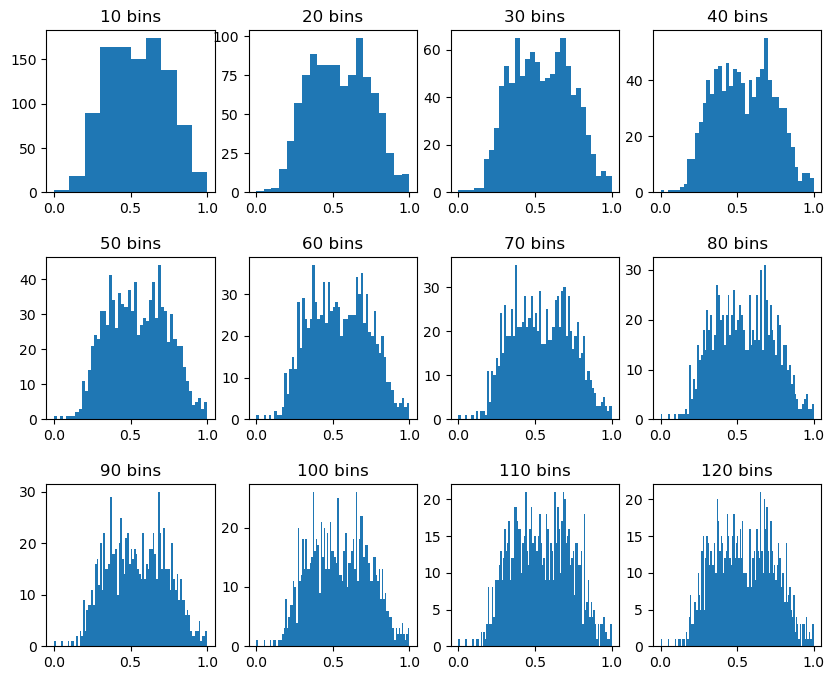

In [36]:
import pandas as pd

file = 'SyntheticDataDistribution.xlsx'
data = pd.read_excel(file, 'Sheet1', )

p, axes = plt.subplots(3, 4, figsize = (10,8))

for i in range(12):
    element = (i//4, i%4)
    axes[element].hist(data, (i + 1) * 10 )
    axes[element].set_title(str((i + 1) * 10) + ' bins')

plt.subplots_adjust(hspace=0.4)

print(data)

The plots above make it clear that the histogram can make the answer to a question like the number of independent modes ambiguous. The problem is that when we construct a histogram we have to choose the number of bins to include. There are some principled ways to do this, but in general it can be challenging, especially when we don't know much about the probability distributions that generated the dataset. In this question we explore another method for looking at probability distributions that does not require any binning at all -- the cumulative distribution function. The emprical cumulative distribution function can be estimated directly from samples of a probability distribution.  

First, given a continuous random variable $x$ with a probability distribution given by $f(x)$ the cumulative distribution function is given by:
$$ F(x) = \int_{-\infty}^x f(x^\prime) dx^\prime $$

Intuitively, $F(x)$ for a given value of $x$ gives us the probability of finding a value the random variable $X$ less than $x$.  For example, $F(0.5)$ is the probability of finding a random draw of the variable $x$ -- call the draw $X$ -- that is less than 0.5. The goal of this question is to plot the cumulative distribution function of the data and then compare it to a cumulative distribution function for a Gaussian with the same mean and variance **as the data**.  We'll use this as a crude test of whether or not the data was generated from a Gaussian distribution or not.

In [53]:
import os
print(os.getcwd())

/Users/kaiden/BIOS/26405/HW1


**Question 3.2** (6 pts) Write a piece of code that estimates the cumulative distribution function of the data provided in the file SyntheticDataDistribution.xlsx.  Hint, the code should be very simple. What you should do is rank the observations of the random variable from lowest to highest.  Then for each value that you have in the list, compute the fraction of observations **less** than that value.  Plot this function.  Note that computing this does not require any binning of the data!

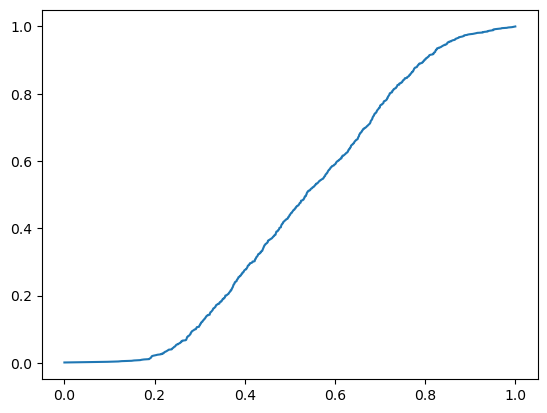

In [39]:
import pandas as pd

file = 'SyntheticDataDistribution.xlsx'
data = pd.read_excel(file, 'Sheet1', )

pdf = np.arange( 1/1000, 1 + 1 / 1000, 1 / 1000)

king_rayat = data.sort_values('Data Samples')
    

plt.plot(king_rayat, pdf)

**Question 3.3** (6pts) For the data provided in the excel file compute the empirical mean and variance of the data. (e.g. simple compute the average and variance of all of the observations). Now, create a synthetic dataset that has the same number of observations (samples) as your provided dataset. To do this you can use the random number generator in numpy that samples from a Gaussian (or normal) distribution (np.random.normal).  Once you have this synthetic dataset sampled from a Gaussian distribution with the same mean and variance as the data then compute the empirical cumulative distribution function of this data and **plot it on top of the cumulative distribution function for the actual data**.  Now do you think the data are generated from a Gaussian distribution or not?

ANSWER: The data does not seem to be generated from a Gaussian distribution-around 0.6-0.8 it deviates quite a bit

Data Samples    0.037002
dtype: float64


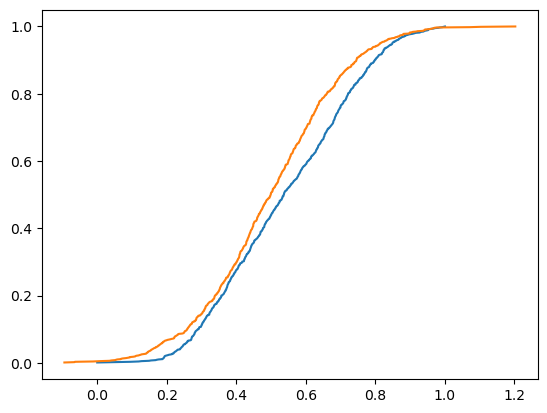

In [73]:
import statistics as st

file = 'SyntheticDataDistribution.xlsx'
data = pd.read_excel(file, 'Sheet1', )

pdf = np.arange( 1/1000, 1 + 1 / 1000, 1 / 1000)
data_synth = []
for i in pdf:
    data_synth.append(np.random.normal(0.5, 0.037002 ** 0.5))

king_rayat = data.sort_values('Data Samples')
sort_data_synth = np.sort(data_synth)
print(king_rayat.var())
#print(data_synth)
#print(sort_data_synth)

plt.plot(king_rayat, pdf)
plt.plot(sort_data_synth, pdf)

## [Problem 4] Correlations between many variables

Often we aquire data that is high-dimensional. Think of signals that have many components -- images, gene expression profiles, dynamics in microbial communities with many species. In many cases we are interested in understanding the relationships between the many dimensions of the signal.  Often we actually want to **reduce** the number of dimensions - that is to figure out which dimensions matter in some sense that we care about.  One way to approach the problem is to look at correlations between the different dimensions of our data.  In this problem we'll explore visualizing correlations.  Later in the course we will study specific ways to use correlations to look for low-dimensional structure in the high-dimensional datasets.  This question is intended to be simple and quick.

load the data in the file gaussian_data.xlsx.  The data are a 1000 x 10 matrix.  The rows are each observations of a 10-dimensional hypothetical measurement, the columns are different measurements. The goal is to just visualize the correlations between different measurements (or dimensions).  We will expore these types of data much more going forward.  Let's call the $i$th column of the dataset $x_i$.

**Question 1** load the data and make a 10 x 10 grid of scatterplots where each panel shows a scatterplot of $x_i$ vs $x_j$ where the panel in the $i$th row and $j$ th column.  For example, the second panel in the first row should show a scatterplot between the first and second columns of the matrix.

**Question 2** Plot the correlation matrix as a heatmap.  In this case, compute the Pearson's correlations coefficient between each pair of columns in the data matrix.  Save these values to a matrix which will be 10 x 10 and symmetric.  Plot the matrix as a heatmap with a colorbar.  Is there a group of dimensions (or measurements) that are all correlated with each other? Which variables is it?

Answer: All the ixi groups are correleted perfectly with each other, shown by the plots of perfect lines running down the diagonal of the 10x10 grid of scatterplots. In addition, groups 4-7 also show pretty high correlation with each other.

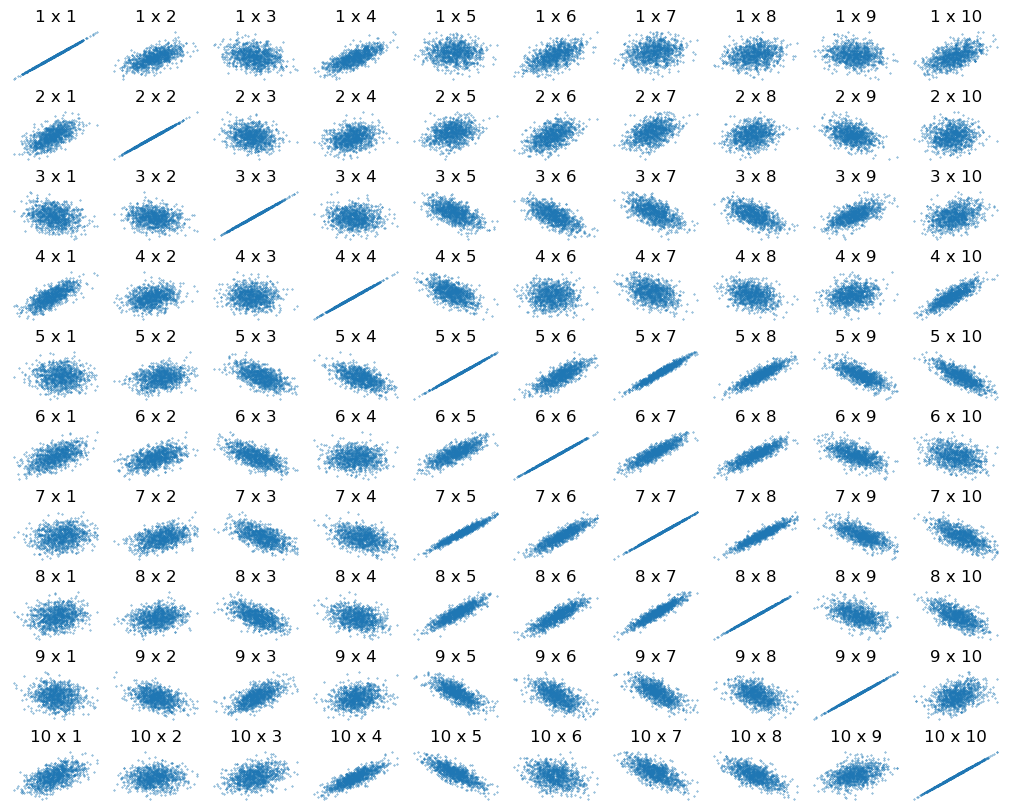

In [159]:
import pandas as pd

file = 'gaussian_data.xlsx'
data = pd.read_excel(file, 'Sheet1', )

p, axes = plt.subplots(10, 10, figsize = (10,8), layout='constrained')

#print(data[1])
for i in range(100):
    element = (i//10, i%10)
    df1 = data[i//10]
    df2 = data[i%10]
    #df1 = pd.Dataframe(data, columns = [i%10])
    #df2 = pd.Dataframe(data, columns = [i//10])
    axes[element].scatter(df1, df2, s=0.1)
    axes[element].set_title(str(i//10 + 1) + ' x ' + str(i%10 + 1))
    axes[element].set_axis_off()
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.4)


            0         1         2         3         4         5         6  \
0    0.562339  0.169491  0.420044  0.106346  0.524775  0.421053  0.879681   
1   -0.935475  0.111266 -0.781885 -1.349669  2.898592  0.778084  2.611139   
2    1.471931 -0.287518  0.353388  1.148507 -0.505616  0.815863  0.322463   
3    0.203612  0.220781  0.417130 -0.299689  0.783564  0.037357  0.566330   
4    1.304948  0.395593  0.591347  1.349105 -2.517660 -0.524997 -2.148193   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.419889  0.238202 -1.148939 -0.473368  3.067499  1.560104  2.981553   
996 -0.944415  0.180103  0.528915 -1.486586  1.580683 -0.085414  1.358028   
997 -1.065616 -0.300861  0.663946 -1.062191 -0.042507 -0.464706 -0.167787   
998  0.705818 -0.193956  0.291376  0.613680 -1.198538  0.229482 -0.569993   
999  0.278920  0.200763 -0.168673 -0.621144  1.830701  0.703294  1.645260   

            7         8         9  
0    0.390085 -0.115984  0.377356  
1  

<Axes: >

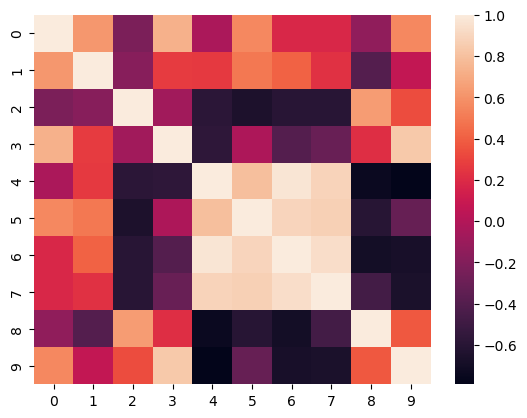

In [160]:
import scipy
import seaborn

file = 'gaussian_data.xlsx'
data = pd.read_excel(file, 'Sheet1', )
cor_mat = [[0 for i in range(10)] for j in range(10)]
print(data)
def func(i,j):
    sum_xy = 0
    sum_x = 0
    sum_y = 0
    sum_xsq = 0
    sum_ysq = 0
    for k in range(len(data[i])):
        sum_xy = sum_xy + data[i][k] * data[j][k]
        sum_x = sum_x + data[i][k]
        sum_y = sum_y + data[j][k]
        sum_xsq = sum_xsq + (data[i][k])**2
        sum_ysq = sum_ysq + (data[j][k])**2
        #if i == j:
            #print(data[i][k])
            #print(data[j][k])
    return (((len(data[i])) * sum_xy) - (sum_x * sum_y)) / ((((1000) * sum_xsq) - sum_x ** 2) * ((1000 * sum_ysq) - sum_y ** 2)) ** 0.5

for i in range(100):
    element = (i//10, i%10)
    elmt1 = i//10
    elmt2 = i%10
    df1 = data[i//10]
    df2 = data[i%10]
    #if elmt1 == elmt2:
        #print(str(elmt1) + str(elmt2))
        #print(func(elmt1, elmt2))
    cor_mat[elmt1][elmt2] = func(elmt1, elmt2)

print(cor_mat)
seaborn.heatmap(cor_mat)